In [1]:
# Понадобится для работы с файлами.
import os

In [2]:
import tensorflow as tf

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

In [3]:
# Очищаем workspace от результатов прежних запусков.
!rm -rf ./*

In [4]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  6837k      0  0:01:57  0:01:57 --:--:-- 6665k.9M    0     0  8926k      0  0:01:30  0:00:02  0:01:28 8922k65.0M    0     0  7370k      0  0:01:49  0:00:09  0:01:40 6967k 24  196M    0     0  6933k      0  0:01:56  0:00:29  0:01:27 7306k  0  6848k      0  0:01:57  0:00:45  0:01:12 7020k86M   52  415M    0     0  6848k      0  0:01:57  0:01:02  0:00:55 6802k09M    0     0  6862k      0  0:01:57  0:01:16  0:00:41 6827k


In [5]:
!unzip -q kagglecatsanddogs_3367a.zip

In [6]:
!ls

2_classification_keras_cats_and_dogs.ipynb
MSR-LA - 3467.docx
PetImages
kagglecatsanddogs_3367a.zip
readme[1].txt


In [7]:
!ls PetImages/Cat

0.jpg     11403.jpg 1561.jpg  2969.jpg  4375.jpg  5782.jpg  7189.jpg  8596.jpg
1.jpg     11404.jpg 1562.jpg  297.jpg   4376.jpg  5783.jpg  719.jpg   8597.jpg
10.jpg    11405.jpg 1563.jpg  2970.jpg  4377.jpg  5784.jpg  7190.jpg  8598.jpg
100.jpg   11406.jpg 1564.jpg  2971.jpg  4378.jpg  5785.jpg  7191.jpg  8599.jpg
1000.jpg  11407.jpg 1565.jpg  2972.jpg  4379.jpg  5786.jpg  7192.jpg  86.jpg
10000.jpg 11408.jpg 1566.jpg  2973.jpg  438.jpg   5787.jpg  7193.jpg  860.jpg
10001.jpg 11409.jpg 1567.jpg  2974.jpg  4380.jpg  5788.jpg  7194.jpg  8600.jpg
10002.jpg 1141.jpg  1568.jpg  2975.jpg  4381.jpg  5789.jpg  7195.jpg  8601.jpg
10003.jpg 11410.jpg 1569.jpg  2976.jpg  4382.jpg  579.jpg   7196.jpg  8602.jpg
10004.jpg 11411.jpg 157.jpg   2977.jpg  4383.jpg  5790.jpg  7197.jpg  8603.jpg
10005.jpg 11412.jpg 1570.jpg  2978.jpg  4384.jpg  5791.jpg  7198.jpg  8604.jpg
10006.jpg 11413.jpg 1571.jpg  2979.jpg  4385.jpg  5792.jpg  7199.jpg  8605.jpg
10007.jpg 11414.jpg 1572.jpg  298.jpg   4386.jpg  5793.

In [ ]:
!ls PetImages/Dog

In [9]:
# Отфильтруем изображения, у которых в заголовке нет JFIF. Нам нужна информация о разрешении и соотношении сторон.
for folder_name in ("Cat", "Dog"):
  del_img_cnt = 0
  for file_name in os.listdir(f"PetImages/{folder_name}"):
    file_path = f"PetImages/{folder_name}/{file_name}"
    # Используем менеджер контекста (with) при чтении файла. Файл будет закрыт автоматически при выходе из блока кода.
    with open(file_path, "rb") as file:
      has_jfif = tf.compat.as_bytes("JFIF") in file.peek(10)
      if not has_jfif:
        os.remove(file_path)
        del_img_cnt += 1
  print(f"Удалено {del_img_cnt} изображений из директории {folder_name}")

Удалено 759 изображений из директории Cat
Удалено 831 изображений из директории Dog


In [12]:
# Генерируем обучающую и тестовую выборки.
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32

# Keras понимает, что 2 класса, потому что 2 директории (Cats, Dogs).
# Автоматически будут созданы два лейбла (0 - Cat, 1 - Dog).

training_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = 0.2,
    subset = "training",
    seed = 1337,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = 0.2,
    subset = "validation",
    seed = 1337,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

# (batch_size, image_size[0], image_size[1], num_channels)

AttributeError: module 'tensorflow._api.v1.keras.preprocessing' has no attribute 'flow_from_directory'

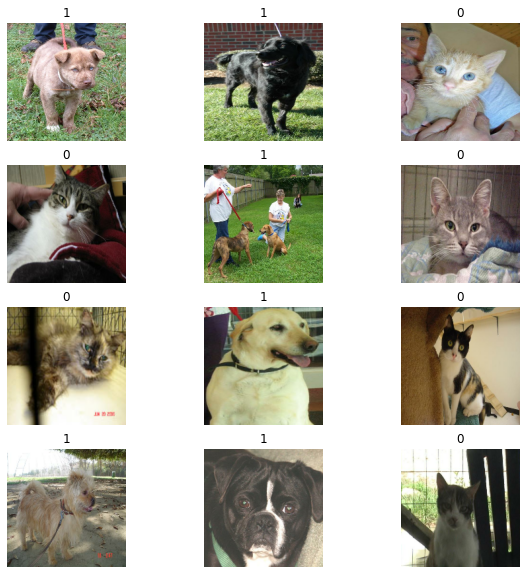

In [11]:
# Посмотрим на изображения.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_images.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [12]:
# Сделаем вспомогательную нейронную сеть для наращивания обучающей выборки.
augmentation_network = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

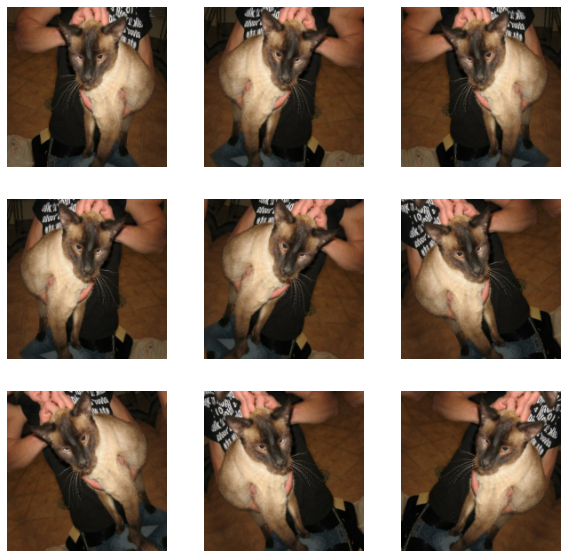

In [13]:
# Пример того, как она работает.
plt.figure(figsize=(10, 10))
for images, _ in training_images.take(1):
    for i in range(9):
        augmented_images = augmentation_network(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [14]:
# Нарастим обучающую выборку.
augmented_training_images = training_images.map(
  lambda image, label: (augmentation_network(image, training = True), label)
)

In [15]:
# Буферизируем ввод.
augmented_training_images = augmented_training_images.prefetch(buffer_size=32)
validation_images = validation_images.prefetch(buffer_size=32)

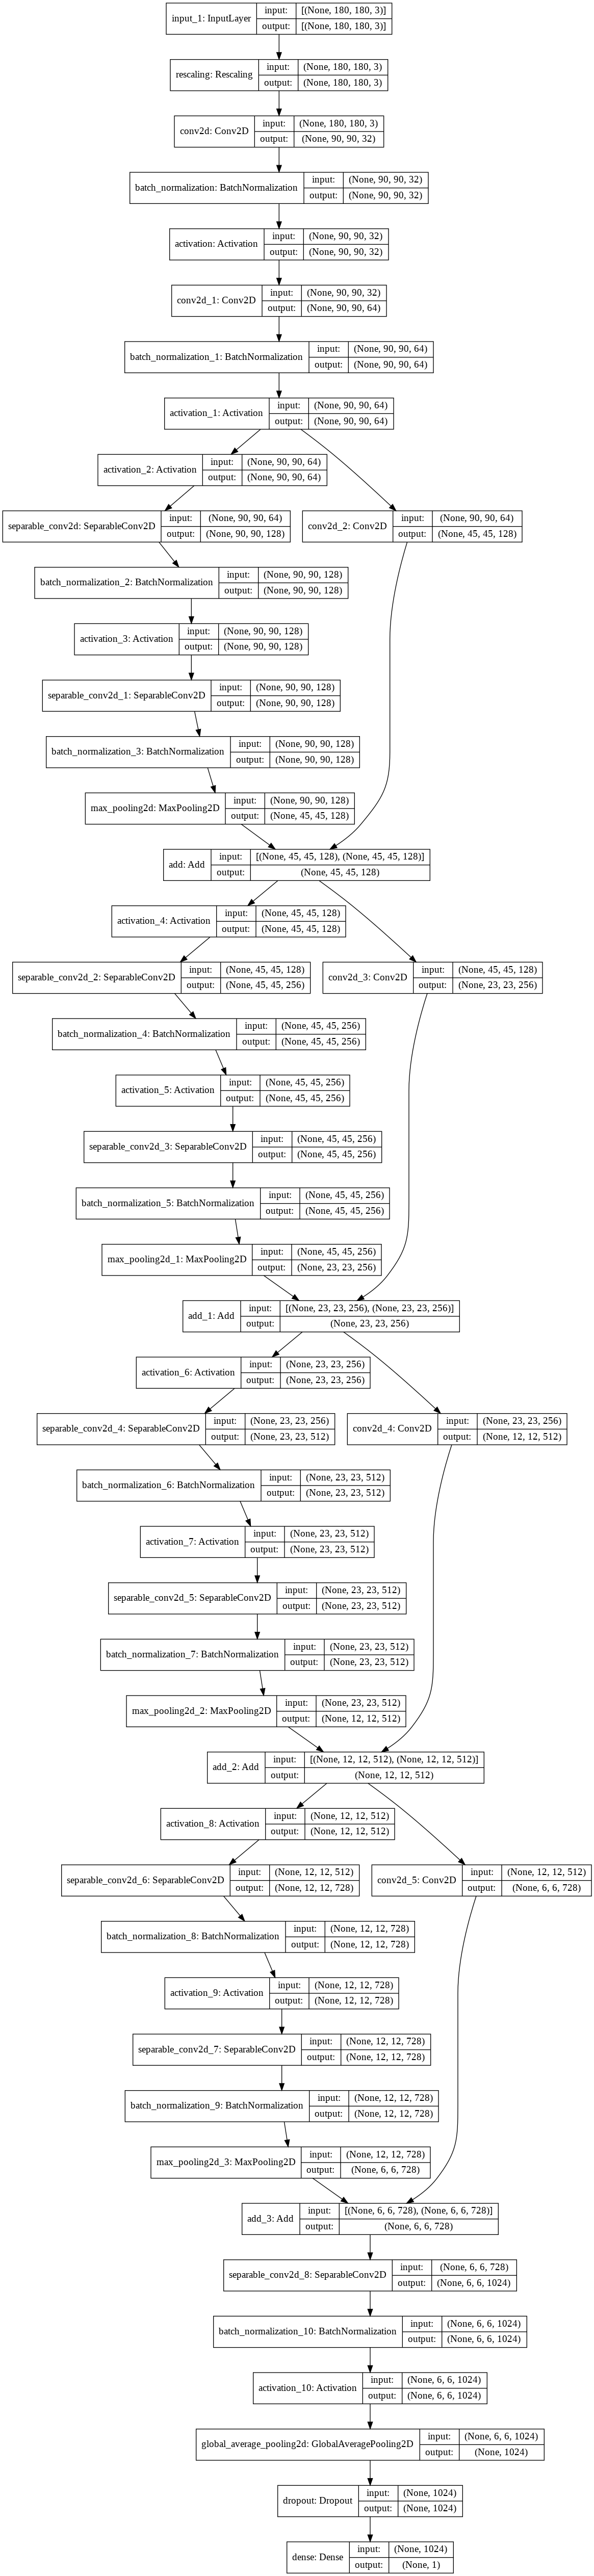

In [16]:
def build_xception_network(input_shape, num_classes):
    inputs = tf.keras.Input(shape = input_shape)

    # Наращивание можно сделать частью архитектуры нейронной сети.
    #x = augmentation_network(inputs)

    x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])
        previous_block_activation = x

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)


model = build_xception_network(input_shape = IMAGE_SIZE + (3,), num_classes = 2)
tf.keras.utils.plot_model(model, show_shapes = True)

In [17]:
# Обучаем нейронную сеть.
EPOCHS = 30

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    augmented_training_images, epochs=EPOCHS, callbacks=callbacks, validation_data=validation_images
)

Epoch 1/50
586/586 [==============================] - 344s 530ms/step - loss: 0.6961 - accuracy: 0.6125 - val_loss: 1.0497 - val_accuracy: 0.5043
Epoch 2/50
586/586 [==============================] - 312s 532ms/step - loss: 0.5381 - accuracy: 0.7292 - val_loss: 0.4578 - val_accuracy: 0.7979
Epoch 3/50
586/586 [==============================] - 312s 531ms/step - loss: 0.4144 - accuracy: 0.8117 - val_loss: 2.2971 - val_accuracy: 0.5325
Epoch 4/50
586/586 [==============================] - 312s 531ms/step - loss: 0.3446 - accuracy: 0.8479 - val_loss: 0.3999 - val_accuracy: 0.8321
Epoch 5/50
586/586 [==============================] - 312s 532ms/step - loss: 0.2867 - accuracy: 0.8805 - val_loss: 0.2823 - val_accuracy: 0.8810
Epoch 6/50
586/586 [==============================] - 314s 535ms/step - loss: 0.2483 - accuracy: 0.8959 - val_loss: 0.3689 - val_accuracy: 0.8276
Epoch 7/50
586/586 [==============================] - 312s 531ms/step - loss: 0.2268 - accuracy: 0.9055 - val_loss: 0.3076 -

Score: [7.736353e-07]
С вероятностью 100.00 процентов на картинке изображена кошка, с вероятностью 0.00 процентов - собака.


(-0.5, 179.5, 179.5, -0.5)

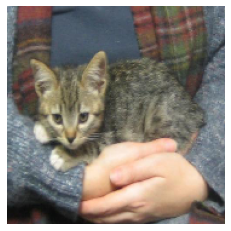

In [44]:
img = tf.keras.preprocessing.image.load_img(
    "PetImages/Cat/3540.jpg", target_size=IMAGE_SIZE
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = predictions[0]
print(f"Score: {score}")
print(
    "С вероятностью %.2f процентов на картинке изображена кошка, с вероятностью %.2f процентов - собака."
    % (100 * (1 - score), 100 * score)
)

plt.imshow(img)
plt.axis("off")